In [118]:
import gzip
import numpy as np
import pandas as pd
from time import time

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [99]:
root = './MNIST/raw/'
if not os.path.exists(root):
    os.mkdir(root)

## Problem is identifying text in image ##
 Our goal is to build a neural network that can take one of these images and predict the digit in the image.

### hello world of image recognition ###

### The steps that we will follow to create a CNN using Keras and Pytroch are as follows ###

- Import basic libraries
- Load the train and test MNIST data
- Visualize the data
- Build the CNN model
- Define Loss function and Optimizer
- Train the model
- Evaluate the model

## EDA with Tensorflow ## 

In [100]:
def read_mnist(images_path: str, labels_path: str):
    with gzip.open(labels_path, 'rb') as labelsFile:
        labels = np.frombuffer(labelsFile.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path,'rb') as imagesFile:
        length = len(labels)
        # Load flat 28x28 px images (784 px), and convert them to 28x28 px
        features = np.frombuffer(imagesFile.read(), dtype=np.uint8, offset=16) \
                        .reshape(length, 784) \
                        .reshape(length, 28, 28, 1)
        
    return features, labels

In [101]:
train = {}
test = {}

train['features'], train['labels'] = read_mnist(root+'train-images-idx3-ubyte.gz',root+'train-labels-idx1-ubyte.gz')
test['features'], test['labels'] = read_mnist(root+'t10k-images-idx3-ubyte.gz', root+'t10k-labels-idx1-ubyte.gz')

In [91]:
print('# of training images:', train['features'].shape[0])
print('# of test images:', test['features'].shape[0])

# of training images: 60000
# of test images: 10000


In [92]:
def display_image(position):
    image = train['features'][position].squeeze()
    plt.title('Example %d. Label: %d' % (position, train['labels'][position]))
    plt.imshow(image, cmap=plt.cm.gray_r)

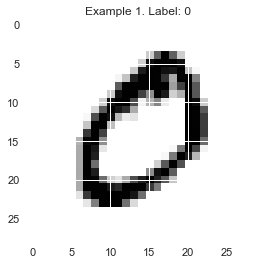

In [93]:
display_image(1)

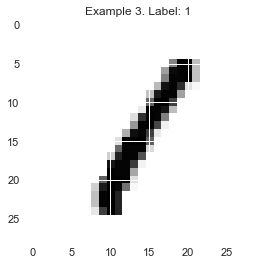

In [80]:
display_image(3)

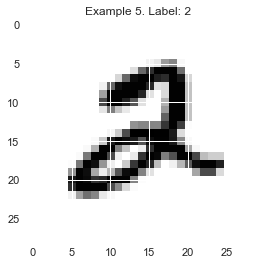

In [83]:
display_image(5)

In [94]:
train_labels_count = np.unique(train['labels'], return_counts=True)
dataframe_train_labels = pd.DataFrame({'Label':train_labels_count[0], 'Count':train_labels_count[1]})
dataframe_train_labels

,Label,Count
0,0,5923
1,1,6742
2,2,5958
3,3,6131
4,4,5842
5,5,5421
6,6,5918
7,7,6265
8,8,5851
9,9,5949


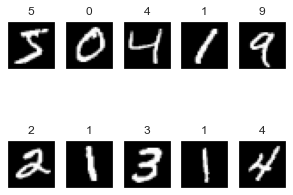

In [95]:
labels=train['labels']
npimg= train['features']

fig = plt.figure(figsize=(5, 4))
for idx in np.arange(10):
    ax=fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
    ax.imshow(npimg[idx].reshape(28,28), cmap='gray')
    ax.set_title(str(labels[idx].item()))

## EDA with Pytorch ##

In [123]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

#To pass our data into our PyTorch models we need to convert it to a PyTorch Dataset. A Tensor Dataset in this case.
# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root=root, train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root=root, train=False,
                                  download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

In [103]:
train_data.train_labels 

/Users/aydafarhadi/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([5, 0, 4,  ..., 5, 6, 8])

In [106]:
# we create bins and count frequency in each bin. 
#This shows that digits in this dataset is not unoifroemn with repect to the number of samples from each class. 
#This dataset is almost balanced

In [104]:
train_data.train_labels.bincount()

tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

In [129]:
#Tensors are mathematical objects that generalize scalars, vectors and matrices to higher dimensions
print('==>>> total trainning batch number: {}'.format(len(train_loader)))
print('==>>> total testing batch number: {}'.format(len(test_loader)))


==>>> total trainning batch number: 3000
==>>> total testing batch number: 500


In [ ]:
#to access individual element from train object, we first pass object to python iter function.
#it turns object to stream of data that we can iterat over
#then use python next function to get next data in stream.

In [130]:
# obtain one batch of training images
dataiter = iter(train_loader)
sample=dataiter.next()

print("length of sample is: ",len(sample))
images, labels = sample
images = images.numpy()


length of sample is:  2


In [131]:
#we have 20 images that have single color channel that have hight and width of 28 by 28
images.shape

(20, 1, 28, 28)

In [110]:
#we have 20 labels one for each of #images in our batch
labels.shape

torch.Size([20])

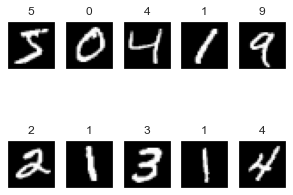

In [132]:
dataiter=iter(train_loader)
images, labels= dataiter.next()
npimg= images.numpy()
fig = plt.figure(figsize=(5, 4))
for idx in np.arange(10):
    ax=fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
    ax.imshow(npimg[idx].reshape(28,28), cmap='gray')
    ax.set_title(str(labels[idx].item()))


In [127]:
import torchvision

labels:  tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9])


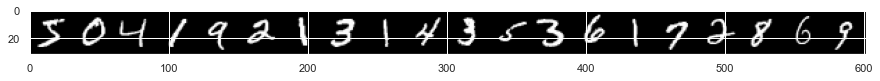

In [133]:
grid=torchvision.utils.make_grid(images,nrow=20)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))

print("labels: ", labels)

In [ ]:
#one test data batch is a tensor of shape: torch.Size([1000, 1, 28, 28]) . This means we have 1000 examples of 28x28 pixels in grayscale (i.e. no rgb channels, hence the one)

In [134]:
examples = iter(test_loader)
example_data, example_targets = examples.next()
example_data.shape


torch.Size([20, 1, 28, 28])